In [23]:
from utils import *

In [24]:
%%capture
# ^^ suppresses warning messages

# Scale IoRs by one percent increments from 95% to 105% of ground truth
ior_scales = np.arange(0.95,1.05,0.01)
gt_iors = {
    'vacuum_ior': 1.0,
    'sapphire_ior': 1.77,
    'CF4_ior': 1.22,
    'quartz_ior': 1.458,
    'Ar_ior': 1.17,
}


scenes = []

# Scale *all* iors by ior_scales
for i in ior_scales:
    diff_iors = {}
    for mat, ior in gt_iors.items():
        if mat == 'vacuum_ior':
            diff_iors[mat] = ior
        else:
            diff_iors[mat] = i * ior
    diff_ior_mats = create_materials(with_fluids=True, iors=diff_iors)
    scenes.append(load_components(diff_ior_mats, use_distorted_jar=False))

# Scale each component individually by ior scales
for mat, ior in gt_iors.items():
    # We don't need to test different vacuum iors...
    if mat == 'vacuum_ior':
        pass
    else:
        # Add a scene with this component's ior scaled by each ior_scales
        for i in ior_scales:
            diff_iors = {}
            for mat2, ior2 in gt_iors.items():
                if mat2 == mat:
                    diff_iors[mat2] = i * ior2
                else:
                    diff_iors[mat2] = ior2
            diff_ior_mats = create_materials(with_fluids=True, iors=diff_iors)
            scenes.append(load_components(diff_ior_mats, use_distorted_jar=False))

In [25]:
print(ior_scales[5]) # index 5 is the ground truth
print(len(scenes)/5) # there are 11 scenes per ior variable (all iors, viewports only, cf4 only, quartz only, and argon only)

1.0
11.0


In [26]:
spp=16
c1 = create_sensor(sensor_number=1, sample_count=spp)
c2 = create_sensor(sensor_number=2, sample_count=spp)
c3 = create_sensor(sensor_number=3, sample_count=spp)

# Extract projection matrices from sensors
c1pose = np.array(c1['to_world'].matrix)[:3,:]
c2pose = np.array(c2['to_world'].matrix)[:3,:]
c3pose = np.array(c3['to_world'].matrix)[:3,:]

poses = np.stack([c1pose, c2pose, c3pose], axis=0)
print(poses)

[[[-6.56510830e-01 -7.29643881e-01  1.91346124e-01 -5.96334600e+00]
  [-6.56510830e-01  6.77617311e-01  3.31403643e-01 -1.03287039e+01]
  [-3.71466011e-01  9.19492841e-02 -9.23882246e-01  1.78488827e+01]]

 [[ 9.23874855e-01 -8.44208353e-06 -3.82694721e-01  1.19286947e+01]
  [ 0.00000000e+00 -1.00000000e+00  2.20595775e-05 -2.20595775e-05]
  [-3.82694721e-01 -2.03802883e-05 -9.23874855e-01  1.78498745e+01]]

 [[-6.56507790e-01  7.29646504e-01  1.91346720e-01 -5.96384668e+00]
  [ 6.56507790e-01  6.77613378e-01 -3.31417680e-01  1.03296175e+01]
  [-3.71476769e-01 -9.19576734e-02 -9.23877120e-01  1.78518772e+01]]]


13


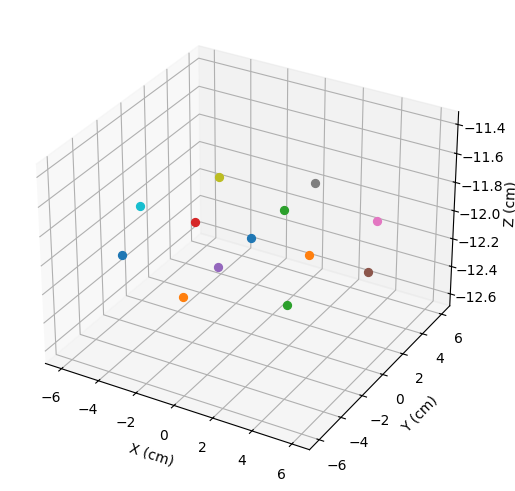

In [219]:
# Create a much sparser grid
# cparams = {
#     'radius': 7.0,
#     'height': 14.0,
#     'rcount': 2,
#     'mtcount': 8,
#     'hcount':  3,
#     'origin': [0.0, 0.0, -12.0],
# }
cparams = {
    'radius': 6.0,
    'height': 14.0,
    'rcount': 2,
    'mtcount': 8,
    'hcount':  1,
    'origin': [0.0, 0.0, -12.0],
}

# cparams = default_cylindrical_grid_params
grid = generate_cylindrical_grid(**cparams)
print(len(grid))

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel("X (cm)")
ax.set_ylabel("Y (cm)")
ax.set_zlabel("Z (cm)")
for point in grid:
    ax.scatter(point[0], point[1], point[2], s=32.0)
fig.tight_layout()

6.0


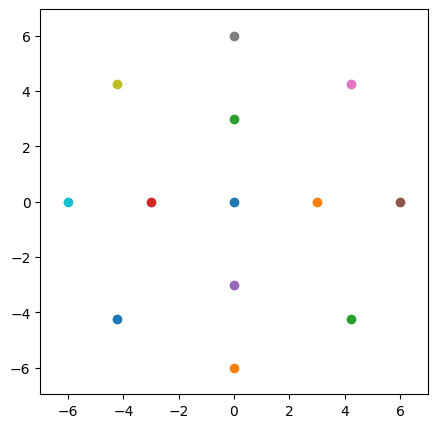

In [218]:
# visualize_grid_2d(grid)
plt.figure(figsize=(5,5))
for p in grid:
    plt.scatter(p[0], p[1])
    plt.axis('equal')
    plt.xlim([-7, 7])
    plt.ylim([-7, 7])
print(np.max(np.array(grid)[:,0]))

In [33]:
locs_dir = "outputs/grid_pixel_locations/diff_iors/"

# in format [c1_0, c1_1, ..., c2_0, c2_1, ..., c3_0, c3_1, ...]
loc_names = [c+"_"+str(i) for c in ["c1", "c2", "c3"] for i in range(len(scenes))]
sensors = [s for s in [c1, c2, c3] for i in range(len(scenes))]

# print(loc_names)
print(len(loc_names))

locs = []
i = 0
for s in sensors:
    try:
        # Try to load if the file already exists
        locs.append(np.load(locs_dir+loc_names[i]+".npy", allow_pickle=True))
    except OSError:
        # Otherwise, calculate and save
        loc = rendered_grid_projections(scenes[i%len(scenes)], s, grid, remapping_default_config)
        np.save(locs_dir+loc_names[i]+".npy", np.array(loc))
        locs.append(loc)
    i += 1

165


In [87]:
print(loc_names)

['c1_0', 'c1_1', 'c1_2', 'c1_3', 'c1_4', 'c1_5', 'c1_6', 'c1_7', 'c1_8', 'c1_9', 'c1_10', 'c1_11', 'c1_12', 'c1_13', 'c1_14', 'c1_15', 'c1_16', 'c1_17', 'c1_18', 'c1_19', 'c1_20', 'c1_21', 'c1_22', 'c1_23', 'c1_24', 'c1_25', 'c1_26', 'c1_27', 'c1_28', 'c1_29', 'c1_30', 'c1_31', 'c1_32', 'c1_33', 'c1_34', 'c1_35', 'c1_36', 'c1_37', 'c1_38', 'c1_39', 'c1_40', 'c1_41', 'c1_42', 'c1_43', 'c1_44', 'c1_45', 'c1_46', 'c1_47', 'c1_48', 'c1_49', 'c1_50', 'c1_51', 'c1_52', 'c1_53', 'c1_54', 'c2_0', 'c2_1', 'c2_2', 'c2_3', 'c2_4', 'c2_5', 'c2_6', 'c2_7', 'c2_8', 'c2_9', 'c2_10', 'c2_11', 'c2_12', 'c2_13', 'c2_14', 'c2_15', 'c2_16', 'c2_17', 'c2_18', 'c2_19', 'c2_20', 'c2_21', 'c2_22', 'c2_23', 'c2_24', 'c2_25', 'c2_26', 'c2_27', 'c2_28', 'c2_29', 'c2_30', 'c2_31', 'c2_32', 'c2_33', 'c2_34', 'c2_35', 'c2_36', 'c2_37', 'c2_38', 'c2_39', 'c2_40', 'c2_41', 'c2_42', 'c2_43', 'c2_44', 'c2_45', 'c2_46', 'c2_47', 'c2_48', 'c2_49', 'c2_50', 'c2_51', 'c2_52', 'c2_53', 'c2_54', 'c3_0', 'c3_1', 'c3_2', 'c3_3

In [31]:
# Check for nones in the detected point locations
i = 0
for p in locs:
    if np.any(np.array(p) == None):
        print(i, np.count_nonzero(np.where(np.array(p) == None, 1, 0))//2)
    i += 1

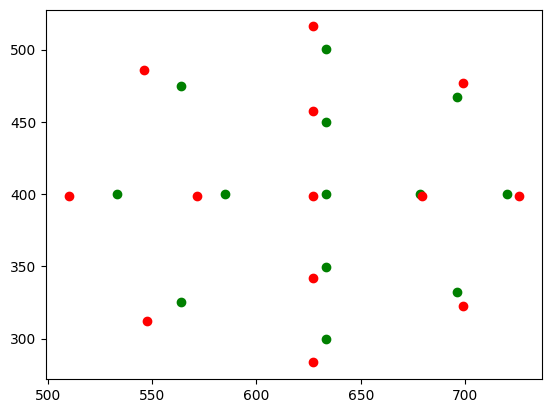

In [130]:
# project the points directly onto the image plane
actualp1 = []
actualp2 = []
actualp3 = []
inv_poses = compute_inverse_pose_matrices(poses)
for g in grid:
    actualp1.append(normalized_to_pixel(reproject(inv_poses[0], g)))
    actualp2.append(normalized_to_pixel(reproject(inv_poses[1], g)))
    actualp3.append(normalized_to_pixel(reproject(inv_poses[2], g)))
actualp1 = np.array(actualp1)
actualp2 = np.array(actualp2)
actualp3 = np.array(actualp3)

# For testing, show the points...
plt.scatter(actualp2[:,0], actualp2[:,1], c='g')
plt.scatter(locs[100][:,0],locs[100][:,1], c='r')

In [141]:
# Compute the distortion coefficients compared to the ground truth reprojections for each of the scenes
i = 0
lenlocs = len(locs)
pces = []
for l in locs:
    if i in range(lenlocs//3):
        pces.append(compute_polynomial_extended_distortion_coeffs(actualp1, l))
    elif i in range(lenlocs//3, 2*lenlocs//3):
        pces.append(compute_polynomial_extended_distortion_coeffs(actualp2, l))
    elif i in range(2*lenlocs//3, lenlocs):
        pces.append(compute_polynomial_extended_distortion_coeffs(actualp3, l))
    i += 1

print(len(pces))
print(pces[56])
print(locs[56])
print(pces[57])
print(locs[57])
print(lenlocs)
# print(i)

165
[[ 9.41860052e+03]
 [-5.52409490e+01]
 [ 1.00533947e-01]
 [-1.33478366e-07]
 [ 1.39787842e-13]
 [-6.44232056e-20]
 [-1.07990322e+02]
 [ 2.46158487e+00]
 [-4.72903635e-03]
 [ 1.72652741e-08]
 [-4.87004023e-14]
 [ 5.84705174e-20]]
[[630.  399. ]
 [574.5 399. ]
 [630.  457.5]
 [681.  399. ]
 [630.  342. ]
 [514.5 399. ]
 [550.5 486. ]
 [630.  514.5]
 [700.5 477. ]
 [729.  399. ]
 [700.5 322.5]
 [630.  285. ]
 [550.5 313.5]]
[[-1.51363099e+04]
 [ 9.19904324e+01]
 [-1.62347193e-01]
 [ 2.12425426e-07]
 [-2.18516990e-13]
 [ 9.87432743e-20]
 [ 1.17025509e+02]
 [ 3.40281682e-01]
 [ 1.27031423e-03]
 [-2.75944305e-09]
 [ 4.03002532e-15]
 [-2.19662315e-21]]
[[630.  399. ]
 [574.5 399. ]
 [630.  457.5]
 [681.  399. ]
 [630.  342. ]
 [513.  399. ]
 [549.  486. ]
 [630.  516. ]
 [702.  477. ]
 [729.  399. ]
 [702.  321. ]
 [630.  283.5]
 [549.  313.5]]
165


In [148]:
# Select one of the ground truth pixel localizations with the refractive surfaces
gt_distorted_locs_c1 = locs[len(ior_scales)//2]
gt_distorted_locs_c2 = locs[(len(ior_scales)//2)+(lenlocs//3)]
gt_distorted_locs_c3 = locs[(len(ior_scales)//2)+(2*lenlocs//3)]

# Undistort the ground truth localizations with each of the calculated distortion coefficients
undistorted_points = []
i = 0
for pce in pces:
    if i in range(0,lenlocs//3):
        undistorted_points.append(polynomial_extended_undistort(gt_distorted_locs_c1, pce))
    elif i in range(lenlocs//3, 2*lenlocs//3):
        undistorted_points.append(polynomial_extended_undistort(gt_distorted_locs_c2, pce))
    elif i in range(2*lenlocs//3, lenlocs):
        undistorted_points.append(polynomial_extended_undistort(gt_distorted_locs_c3, pce))
    i += 1

# plt.scatter(actualp2[:,0], actualp2[:,1], c='g')
# plt.scatter(undistorted_points[100][:,0],undistorted_points[100][:,1], c='r')

# Determine the average pixel error of the remapping compared to ground truth
avg_pixel_errors = []
i = 0
for points in undistorted_points:
    if i in range(0,lenlocs//3):
        avg_pixel_errors.append(np.mean([np.linalg.norm(points[j] - actualp1[j]) for j in range(len(points))]))
    elif i in range(lenlocs//3, 2*lenlocs//3):
        avg_pixel_errors.append(np.mean([np.linalg.norm(points[j] - actualp2[j]) for j in range(len(points))]))
    elif i in range(2*lenlocs//3, lenlocs):
        avg_pixel_errors.append(np.mean([np.linalg.norm(points[j] - actualp3[j]) for j in range(len(points))]))
    i += 1

print(len(avg_pixel_errors))
print(avg_pixel_errors)
print(np.mean(avg_pixel_errors))

165
[4.236127376711424, 3.235089341442286, 2.4450139556054187, 1.7048078508274438, 1.2245424569460779, 0.44209193408807396, 0.7485891451365005, 1.5096910748976025, 2.2811729701751413, 2.7878695612878697, 3.5676310183374436, 0.49615130752856984, 0.47948480855875736, 0.47948480855875736, 0.43354772596508057, 0.43354772596508057, 0.44209193408807396, 0.44209193408807396, 0.44209193408807396, 0.43354772596508057, 0.44461313519798307, 0.44461313519798307, 3.01063499874212, 2.152721800672573, 1.765495923833126, 1.2744758384901178, 0.7669272306506628, 0.44209193408807396, 1.0315000085112582, 1.2531313813127463, 1.6417394706279405, 2.3407365991019065, 2.870534274866689, 0.4704604231803714, 0.44461313519798307, 0.4870752076164788, 0.4870752076164788, 0.5288964967759336, 0.44209193408807396, 0.43354772596508057, 0.43354772596508057, 0.5768891775738891, 0.48216494399152937, 0.44209193408807396, 4.198976849234272, 3.232712886081891, 2.4055007903429746, 1.7635472849393534, 0.9554560503075394, 0.442

In [149]:
# Now, determine the average triangulation error compared to ground truth

# First, determine the predicted locations using n-view triangulation for each of the points...
predictions = []
ns = len(loc_names)//3
for i in range(ns):
    for j in range(len(undistorted_points[i])):
        clocs = np.stack([undistorted_points[i][j], undistorted_points[i+ns][j], undistorted_points[i+2*ns][j]])
        clocsn = np.array([normalize_coordinate(c) for c in clocs])
        predictions.append(n_view_triangulate(poses, clocsn))

# And find the average distance in cm for points in each scene
tp = grid*(len(predictions)//len(grid))
triangulation_errors = []
i = 0
for pred in predictions:
    triangulation_errors.append(np.linalg.norm(pred - tp[i]))
    i += 1
triangulation_errors = np.array(triangulation_errors).reshape((-1,13))
print(triangulation_errors[5])
avg_triangulation_errors = np.mean(triangulation_errors, axis=1)
print(avg_triangulation_errors[5])

[0.0329905  0.04074056 0.01464514 0.02310213 0.04119145 0.01443227
 0.02207035 0.04563048 0.02110109 0.01761435 0.01898841 0.06237321
 0.01142552]
0.028177343334186148


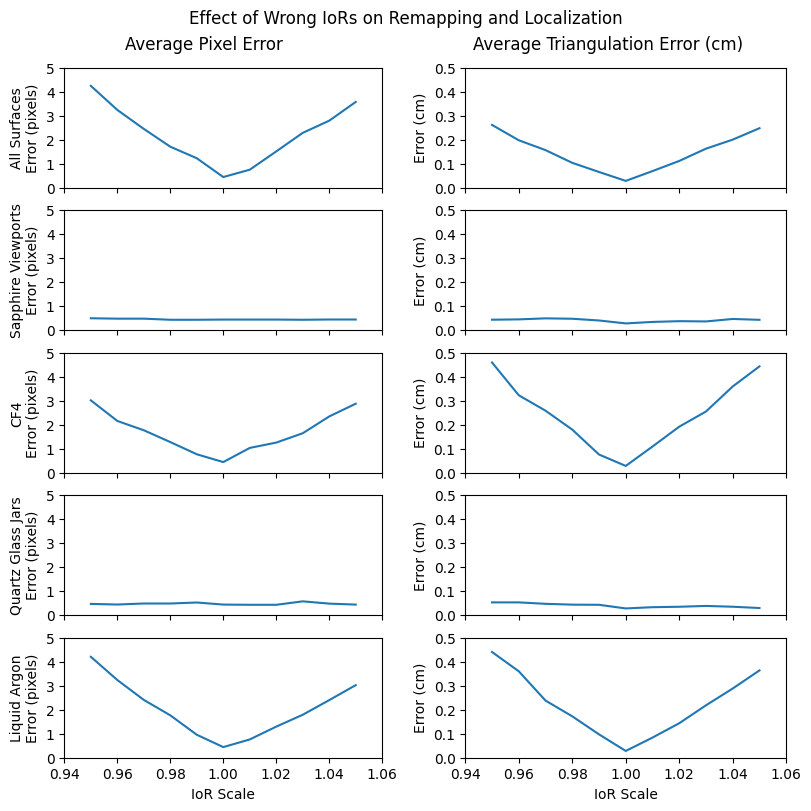

In [209]:
fig = plt.figure(constrained_layout=True, figsize=(8,8))
fig.suptitle("Effect of Wrong IoRs on Remapping and Localization")
subfigs = fig.subfigures(nrows=1, ncols=2)
subfigs[0].suptitle("Average Pixel Error")
subfigs[1].suptitle("Average Triangulation Error (cm)")

iorlen = len(ior_scales)

axsl = subfigs[0].subplots(nrows=5, ncols=1, sharex='all', sharey='all')
ylabels = ['All Surfaces', 'Sapphire Viewports', 'CF4', 'Quartz Glass Jars', 'Liquid Argon']
for row, ax in enumerate(axsl):
    ax.plot(ior_scales, avg_pixel_errors[row*iorlen:(row+1)*iorlen])
    ax.set_ylabel(ylabels[row]+"\nError (pixels)")
    ax.set_ylim([0, 5])
    ax.set_yticks(np.arange(0, 6, 1))
    ax.set_xticks(np.arange(0.94, 1.06, 0.02))
    if row == len(axsl)-1:
        ax.set_xlabel("IoR Scale")

axsr = subfigs[1].subplots(nrows=5, ncols=1, sharex='all', sharey='all')
for row, ax in enumerate(axsr):
    ax.plot(ior_scales, avg_triangulation_errors[row*iorlen:(row+1)*iorlen])
    ax.set_ylabel("Error (cm)")
    ax.set_ylim([0, 0.5])
    ax.set_yticks(np.arange(0, 0.6, 0.1))
    ax.set_xticks(np.arange(0.94, 1.06, 0.02))
    if row == len(axsr)-1:
        ax.set_xlabel("IoR Scale")


# fig, axes = plt.subplots(5, 2, figsize=(9,18), sharex='all')
# plot_data(axes[0][0], avg_pixel_errors[:11], "Average Pixel Error")
# plot_data(axes[0][1], avg_triangulation_errors[:11], "Average Triangulation Error", ylabel="Triangulation Error (cm)")

In [11]:
# undistort_points = 5
# actual_mode = 0
# undistort_mode = ""

# if undistort_points == 0: # compare to predicted position using OpenCV with no distortive elements
#     undistort_mode = "Using OpenCV Estimated Pixel Positions With No Distortive Elements"
#     up1 = locs[0]
#     up2 = locs[3]
#     up3 = locs[6]
# elif undistort_points == 1: # compare to predicted position using OpenCV with distortive elements
#     undistort_mode = "Using OpenCV Estimated Pixel Positions With Distortive Elements"
#     up1 = locs[1]
#     up2 = locs[4]
#     up3 = locs[7]
# elif undistort_points == 2: # compare to predicted position using OpenCV with distortive elements and wrong IoRs
#     undistort_mode = "Using OpenCV Estimated Pixel Positions With Distortive Elements With Wrong IoRs"
#     up1 = locs[2]
#     up2 = locs[5]
#     up3 = locs[8]
# elif undistort_points == 3: # use the linear distortion coefficients to undistort the points computed by opencv
#     undistort_mode = "Using Linear Distortion Model"
#     up1 = linear_undistort(locs[1], lc1)
#     up2 = linear_undistort(locs[4], lc2)
#     up3 = linear_undistort(locs[7], lc3)
# elif undistort_points == 4: # use the polynomial distortion coefficients to undistort the points computed by opencv
#     undistort_mode = "Using Polynomial Distortion Model"
#     up1 = polynomial_undistort(locs[1], pc1)
#     up2 = polynomial_undistort(locs[4], pc2)
#     up3 = polynomial_undistort(locs[7], pc3)
# elif undistort_points == 5: # use the extended polynomial distortion coefficients to undistort the points computed by opencv
#     undistort_mode = "Using Extended Polynomial Distortion Model"
#     up1 = polynomial_extended_undistort(locs[1], pce1)
#     up2 = polynomial_extended_undistort(locs[4], pce2)
#     up3 = polynomial_extended_undistort(locs[7], pce3)


# projected = np.array(up1)

# actual_mode_d = ""
# if actual_mode == 0: # Use exact reprojections
#     actual = np.array(actualp1)
#     actual_mode_d = "Ground Truth Reprojections"
# elif actual_mode == 1: # Use OpenCV predicted positions without refractive elements
#     actual = np.array(locs[0])
#     actual_mode_d = "OpenCV Predicted Positions"
# elif actual_mode == 2: # Use OpenCV predicted positions with refractive elements
#     actual = np.array(locs[1])

# remapping_errors = []
# for i in range(actual.shape[0]):
#     if np.all(projected[i]) and np.all(actual[i]):
#         remapping_errors.append(np.linalg.norm(actual[i] - projected[i]))
# avg_remapping_error = np.average(np.array(remapping_errors))
# print(avg_remapping_error)

# # jar_surface_mode = "Distorted Jar Surface and Estimated Pose"
# jar_surface_mode = "Ideal Jar Surface and Ground Truth Pose"
# # jar_surface_mode = "Ideal Jar Surface and Ground Truth Pose, IoRs off by -1%"
# plt.figure(figsize=(8,8))
# plt.scatter(actual[:200,0], actual[:200,1], c='g', label=actual_mode_d)
# plt.scatter(projected[:200,0], projected[:200,1], c='r', label="Remapped Positions")
# plt.axis('equal')
# plt.legend()
# plt.title(jar_surface_mode+"\n Fit "+undistort_mode+"\nAverage Remapping Error: " + "{:.4f}".format(avg_remapping_error)+" pixels")

In [12]:
# use_actual_reprojections = False
# random_pixel_offset = 0.0
# opt_mode = 1
# opt_name = ""

# predictions = []
# losseses = [] # great naming, I know :)
# print("Number of points: ", up1.shape[0])
# for i in range(up1.shape[0]):
#     if use_actual_reprojections:
#         clocs = np.stack([actualp1[i], actualp2[i], actualp3[i]])
#     else:
#         clocs = np.stack([up1[i], up2[i], up3[i]], axis=0)

#     if np.all(clocs != None):

#         clocs = np.array([normalize_coordinate(random_pixel_offset*random_in_unit_circle() + c) for c in clocs])

#         if opt_mode == 1: # N-view
#             predictions.append(n_view_triangulate(poses, clocs))
#             opt_name = "N-view Triangulation"
#         elif opt_mode == 2: # N-view basic gradient descent
#             pred, _, losses = gradient_descent_optimization(poses, clocs, iterations=100, delta=0.0005, scale_delta=False)
#             predictions.append(pred)
#             losseses.append(losses)
#             opt_name = "N-view Triangulation with Basic Gradient Descent"
#         elif opt_mode == 3: # N-view basic gradient descent with delta scaling
#             pred, _, losses = gradient_descent_optimization(poses, clocs, iterations=100, delta=0.001, scale_delta=True)
#             predictions.append(pred)
#             losseses.append(losses)
#             opt_name = "N-view Triangulation with Basic Gradient Descent and Delta Scaling"
#         elif opt_mode == 4: # N-view gradient descent
#             pred, _, losses = gradient_descent_optimization(poses, clocs, iterations=100, delta=0.01, scale_delta=False, basic_mode=False)
#             predictions.append(pred)
#             losseses.append(losses)
#             opt_name = "N-view Triangulation with Gradient Descent"
#         elif opt_mode == 5: # N-view gradient descent with delta scaling
#             pred, _, losses = gradient_descent_optimization(poses, clocs, iterations=100, delta=0.1, scale_delta=True, basic_mode=False)
#             predictions.append(pred)
#             losseses.append(losses)
#             opt_name = "N-view Triangulation with Gradient Descent and Delta Scaling"
#         elif opt_mode == 6: # N-view levenberg_marquardt
#             pred, _, losses = levenberg_marquardt_optimization(poses, clocs, iterations=20, delta=0.0001, lmb=1.0, scale_lmb=2.0)
#             predictions.append(pred)
#             losseses.append(losses)
#             opt_name = "N-view Triangulation with Levenberg-Marquardt"
#         else: # average two-view
#             opt_name = "Averge Mid-point Two View Triangulation"
#             predictions.append(average_two_view_triangulate(poses, clocs))
#     else:
#         predictions.append(np.array([None, None, None]))
#     print("Current Point: ", i, end='\r')

# predictions = np.array(predictions)

# errors = []
# i = 0
# for pred in predictions:
#     if np.all(pred != None):
#         err = np.linalg.norm(pred - grid[i])
#         errors.append(err)
#     else:
#         errors.append(None)
#     i += 1
# errors = np.array(errors)

# # print(errors)

In [13]:
# nerrors = np.array([e for e in errors if e != None])
# vmax = np.max(nerrors)
# print("Max error (cm):", vmax)
# avgerr = np.average(nerrors)
# print("Average error (cm): ", avgerr)

# fig = plt.figure(figsize=(12,8))
# ax = fig.add_subplot(projection='3d')
# ax.set_title(opt_name+"\nAvg Error: "+"{:.4e}".format(avgerr)+" cm, Max Error: "+"{:.4e}".format(vmax)+" cm", fontsize=14)
# # ax.set_title("IoRs off by -1%\nAvg Error: "+"{:.4e}".format(avgerr)+" cm, Max Error: "+"{:.4e}".format(vmax)+" cm", fontsize=14)
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z')

# i = 0
# sc = None
# for point in grid:
#     if errors[i] != None:
#         sc = ax.scatter(point[0], point[1], point[2], c=errors[i], cmap='viridis', vmin=0, vmax=vmax)
#     i += 1
# fig.colorbar(sc, label="error (cm)")

In [14]:
# fig = plt.figure(figsize=(8,6))
# ax = fig.add_subplot()

# i = 0
# n = len(losseses)
# m = 20
# for ls in losseses:
#     if i%(n//m) == 0: # Choose m of the loss curves
#         # ax.plot(ls)
#         ax.plot(ls/np.min(ls)) # normalize by minimum loss to check convergence
#     i += 1
# ax.set_xlabel("Iteration")
# # ax.set_ylabel("Sum of Reprojection Errors")
# ax.set_ylabel("Normalized Sum of Reprojection Errors")
# avg_improvement = (np.average(np.array([ls[0]/ls[-1] for ls in losseses]))-1)*100
# ax.set_title(opt_name+"\nAverage Improvement in Reprojection Error: "+"{:.4f}".format(avg_improvement)+"%")

In [15]:
# # Round max up to closest tenths place in error. 10 left-aligned bins per 0.1cm interval
# bins = np.arange(int(np.max(nerrors)*10+1)*10)/100
# plt.figure(figsize=(7,5))
# plt.hist(nerrors, bins=bins)
# plt.xlabel("Triangulation Error (cm)")
# plt.ylabel("Count")
# plt.title(opt_name+"\nMean: " + "{:.4e}".format(np.mean(nerrors)) + " cm, Stddev: " + "{:.4e}".format(np.std(nerrors)) + " cm")
# print(np.mean(nerrors))
# print(np.std(nerrors))

In [16]:
# from mpl_toolkits.mplot3d import Axes3D

# fig = plt.figure(figsize=(12,12))
# ax = fig.add_subplot(projection='3d')

# i = 0
# for pred in predictions:
#     if np.all(pred != None):
#         point = grid[i]
#         dir = pred - point
#         ldir = np.linalg.norm(dir) #* 10 # 10x length to make errors move visible
#         ax.quiver(point[0], point[1], point[2], dir[0], dir[1], dir[2],
#                   pivot='tail', length=ldir, arrow_length_ratio=0.3)
#     i += 1
